In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white", palette='pastel')
sns.set(font_scale = 2)
import os

In [12]:
Years = pd.read_csv('./GCAM_full/20220421_gcam_production.csv')
Years = Years.columns.values.tolist()[5:-1] ## string
# Scenario = pd.read_csv('./GCAM_full/20220421_gcam_production.csv', usecols=['scenario']).squeeze().unique().tolist()[0:-1]

Trucks = [0.5, 1, 5, 10]
Barges = [0.5, 1, 5, 10]
Rails = [0.5, 1, 5, 10]
Oceans = [0.5, 1, 5, 10]

def sameRate():
    rates = []
    for truck in Trucks:
        for barge in Barges:
             for rail in Rails:
                for ocean in Oceans:
                    if truck == barge == rail == ocean:
                        rates_text = str(truck) + '_' + str(barge) + '_' + str(rail) + '_' + str(ocean)
                        #print(rates_text)
                        rates.append(rates_text)
    rates.insert(2, '1_5_5_5')
    rates.insert(3, '1_5_5_10')
    rates.insert(3, '1_5_10_10')
    rates.insert(3, '1_10_10_10')
    print(rates)
    return rates

Scenarios = ['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5']
root = './Exps/'

## 不同 Scenario 不同 Rate 下 OBJ 和 Exported（%） 对比

In [13]:
Rates = sameRate()
data = pd.DataFrame()
for scenario in Scenarios:
    for year in Years:
        path = root + scenario + '/'
        data0 = pd.read_csv(path + 'all_rates_'+ year + '.csv').query('Rates == @Rates')
        data0['Exported(%)'] =  data0['Quantity_Z_Export_Import'] / data0['Total_production']
        data = pd.concat([data,data0])
data

['0.5_0.5_0.5_0.5', '1_1_1_1', '1_5_5_5', '1_10_10_10', '1_5_10_10', '1_5_5_10', '5_5_5_5', '10_10_10_10']


,Scenario,Year,Rates,OBJ_vaules,Cost_Farmers,Cost_Barges,Cost_Rails,Cost_Oceans,Total_production,Quantity_X_Facility,Quantity_X_Country_Stream,Quantity_X_Country_Rail,Quantity_Y_Stream_Export,Quantity_Y_Rail_Export,Quantity_Z_Export_Import,Demand,Exported(%)
0,SSP1,1990,0.5_0.5_0.5_0.5,1270041975041,633209632186,101500387929,91574708179,439811557631,37099777725,11129933317,8218929356,11832264464,8218929356,11832264464,20051193821,9414617,0.540467
85,SSP1,1990,1_1_1_1,2240205731626,970486735031,203000775858,183149416358,879623115263,37099777725,11129933317,8218929356,11832264464,8218929356,11832264464,20051193821,9414617,0.540467
106,SSP1,1990,1_5_5_5,7081989101603,1170072081004,49163398488,1473471849042,4385336083953,37099777725,11129933317,410219708,19640974112,410219708,19640974112,20051193821,9414617,0.540467
107,SSP1,1990,1_5_5_10,11401437685414,1179585376788,39559033797,1735164244719,8443183340994,37099777725,11129933317,330080828,19721112992,330080828,19721112992,20051193821,9414617,0.540467
111,SSP1,1990,1_5_10_10,12411093492401,1074433180555,2094374209247,356493991289,8881846422194,37099777725,11129933317,17475471666,2575722154,17475471666,2575722154,20051193821,9414617,0.540467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,SSP5,2100,1_5_5_10,43487456767315,4307602865249,161416591454,6643134114297,32202327306108,136697311478,41009193443,1346861061,75180153239,1346861061,75180153239,76527014300,4555876468,0.559828
111,SSP5,2100,1_5_10_10,47270390431313,3852717769230,8041985815857,1304420698153,33898290257867,136697311478,41009193443,67102380579,9424633720,67102380579,9424633720,76527014300,4555876468,0.559828
127,SSP5,2100,1_10_10_10,49453545727110,4390791669681,0,11352513040500,33537265126723,136697311478,41009193443,0,76527014300,0,76527014300,76527014300,4555876468,0.559828
170,SSP5,2100,5_5_5_5,37962165526253,13539467193125,4090155413398,3349416533722,16810150495802,136697311478,41009193443,32950034833,43576979467,32950034833,43576979467,76527014300,4555876468,0.559828


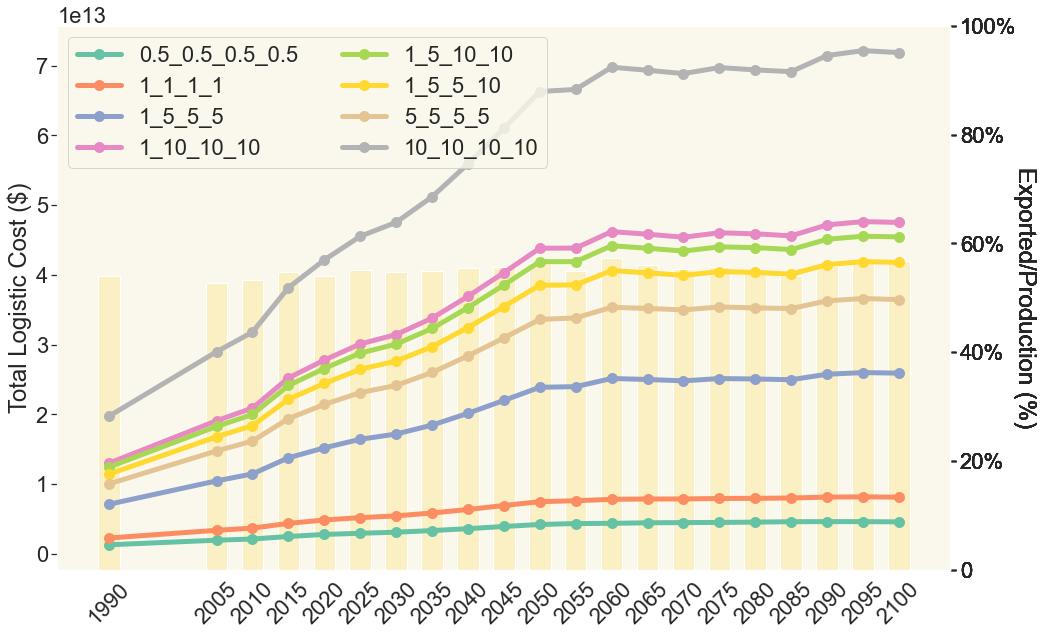

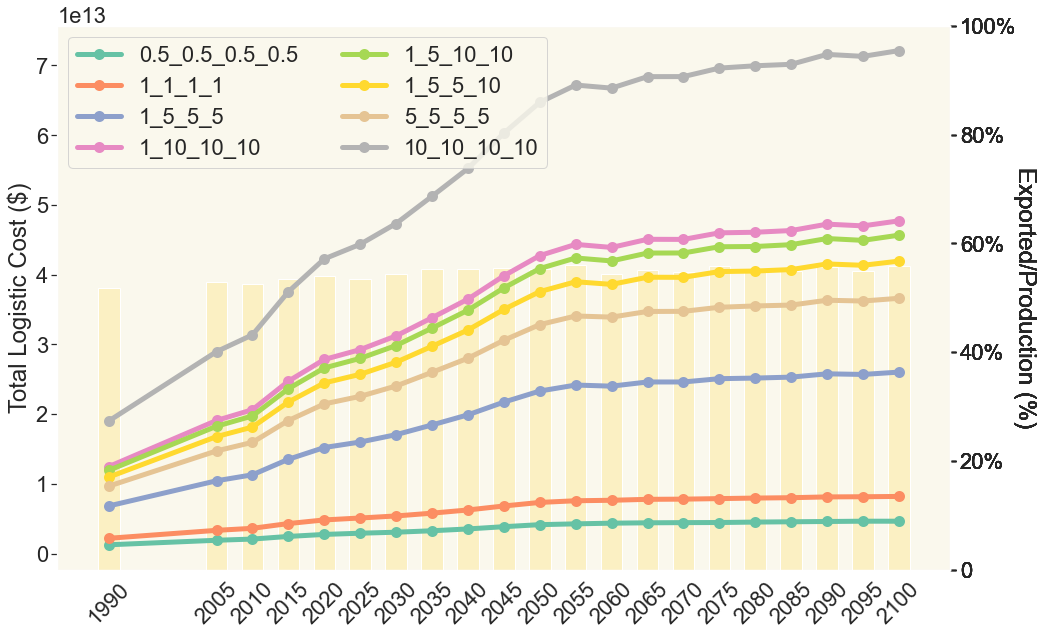

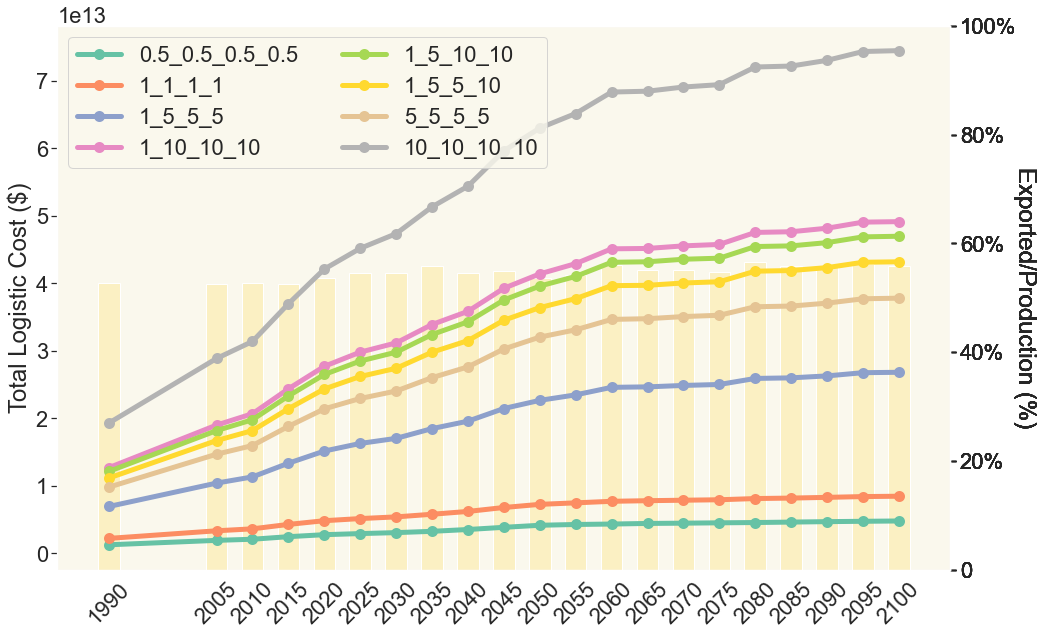

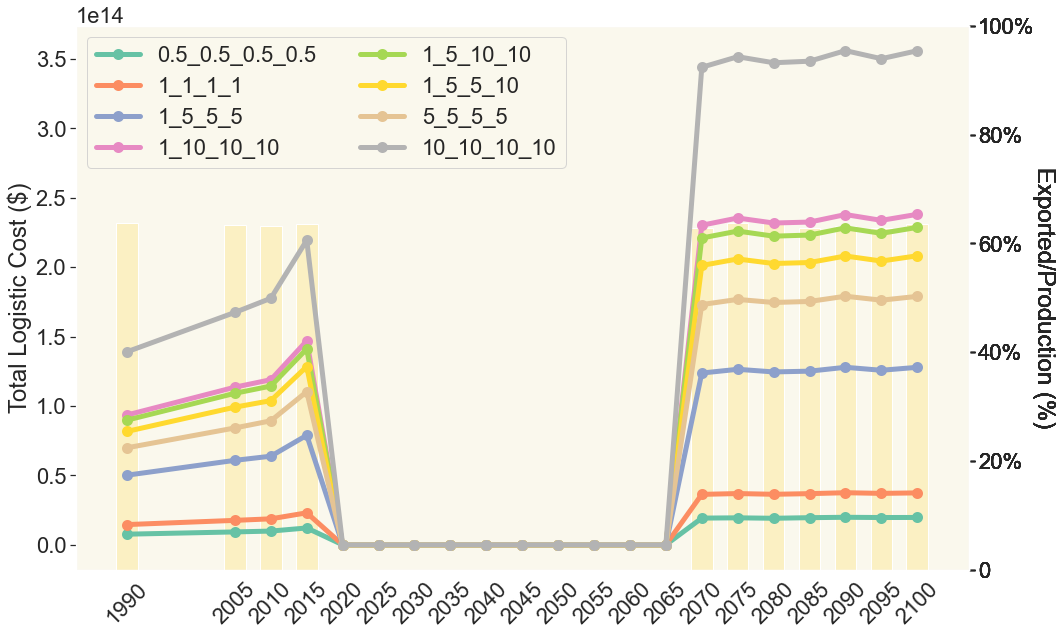

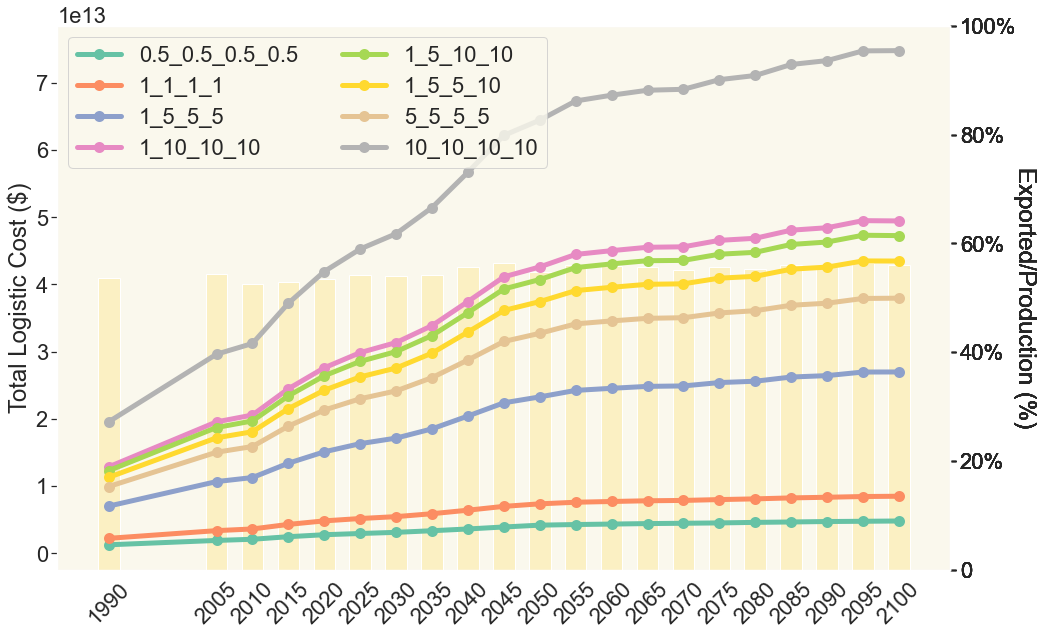

In [34]:
root = os.path.abspath('.')
path = root + '\Figs\\'
sns.color_palette("Set2")
for row, scenario in enumerate(Scenarios):
    fig, ax = plt.subplots(1, sharex='col', sharey='row', figsize=(16,10))
    for col, rate in enumerate(Rates):
        data0 = data.query('Scenario == @scenario').query('Rates == @rate')
        # data0.plot(x='Year', y='OBJ_vaules', style='o-', label=rate, ax = ax[row], title = scenario + '_' + 'Obj')
        ax.plot('Year', 'OBJ_vaules', data = data0, marker='o', label=rate, linewidth=5, markeredgewidth=5)
        ax.legend(ncol=2,facecolor='#faf8ed')
        ax.patch.set_visible(False)

        ax2 = ax.twinx()
        ax2.bar('Year', 'Exported(%)', data = data0, width=3, color='#fbf0c3')
        ax2.set_ylim(0, 1)
        ax2.set_yticks([0,0.2,0.4,0.6,0.8,1 ])
        ax2.set_yticklabels(['0','20%','40%','60%','80%','100%'])

        ax2.set_facecolor('#faf8ed')
        ax.set_zorder(ax2.get_zorder()+1)
        ax2.patch.set_visible(True)

        ax2.set_xticks([int(x) for x in Years])
        ax2.set_label(Years)

        ax.grid(False)
        ax2.grid(False)

        # ax2.set_title(scenario, pad=20)
        ax2.set_ylabel('Exported/Production (%)', rotation=270, labelpad=20)
        ax.set_ylabel('Total Logistic Cost ($)')
        ax.tick_params(axis='x', labelrotation=45)

    fig.savefig(path + 'Cost_{}.pdf'.format(scenario), dpi=300, bbox_inches="tight")

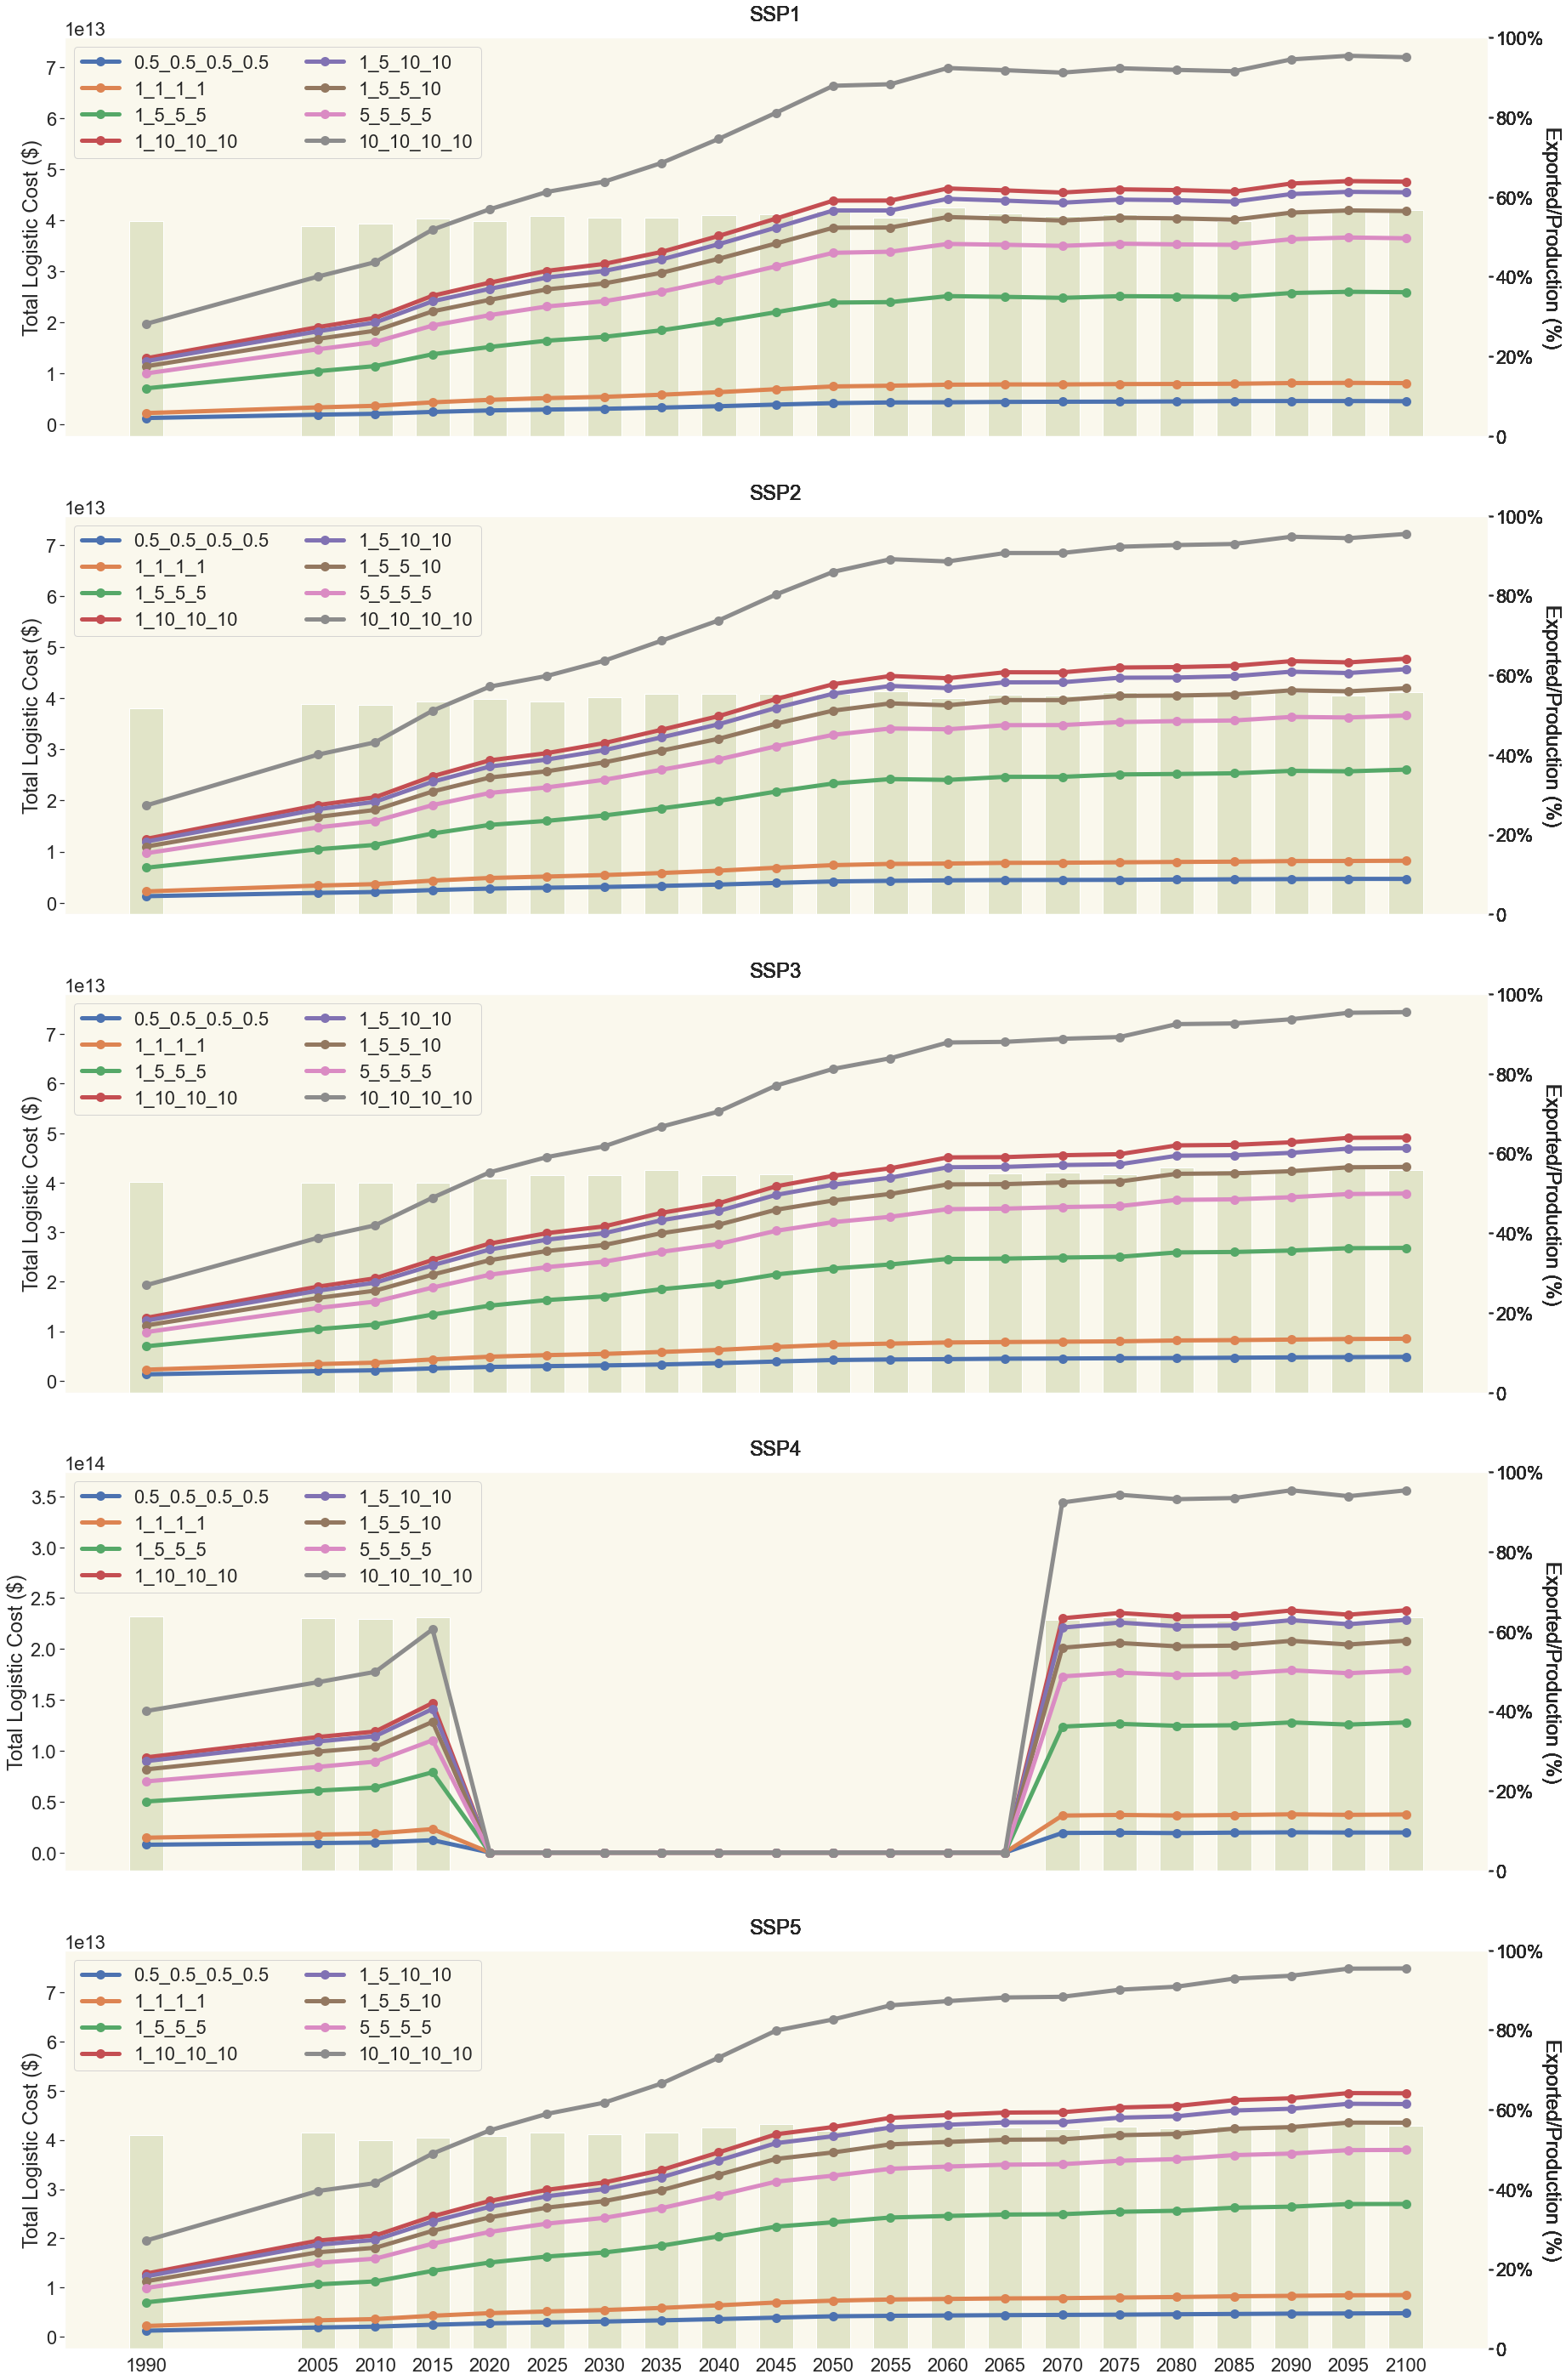

In [21]:
fig, ax = plt.subplots(5, 1, sharex='col', sharey='row', figsize=(30,50))
for row, scenario in enumerate(Scenarios):
    for col, rate in enumerate(Rates):
        data0 = data.query('Scenario == @scenario').query('Rates == @rate')
        # data0.plot(x='Year', y='OBJ_vaules', style='o-', label=rate, ax = ax[row], title = scenario + '_' + 'Obj')
        ax[row].plot('Year', 'OBJ_vaules', data = data0, marker='o', label=rate, linewidth=5, markeredgewidth=5)
        ax[row].legend(ncol=2,facecolor='#faf8ed')
        ax[row].patch.set_visible(False)
        
        ax2 = ax[row].twinx()
        ax2.bar('Year', 'Exported(%)', data = data0, width=3, color='#e1e4c8')
        ax2.set_ylim(0, 1)
        ax2.set_yticks([0,0.2,0.4,0.6,0.8,1 ])
        ax2.set_yticklabels(['0','20%','40%','60%','80%','100%'])

        ax2.set_facecolor('#faf8ed')
        ax[row].set_zorder(ax2.get_zorder()+1)
        ax2.patch.set_visible(True)
        
        ax2.set_xticks([int(x) for x in Years])
        ax2.set_label(Years)
        
        ax[row].grid(False)
        ax2.grid(False)
        
        ax2.set_title(scenario, pad=20)
        ax2.set_ylabel('Exported/Production (%)', rotation=270, labelpad=20)
        ax[row].set_ylabel('Total Logistic Cost ($)')

In [109]:
df = pd.read_csv('./Exps/all_rates_1990.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: './Exps/all_rates_1990.csv'

In [ ]:
sns.lineplot(data=df, x='Rates', y='OBJ_vaules')

In [ ]:
rates = []
for truck in Trucks:
    for barge in Barges:
         for rail in Rails:
            for ocean in Oceans:
                if truck == barge == rail == ocean:
                    rates_text = str(truck) + '_' + str(barge) + '_' + str(rail) + '_' + str(ocean)
                    rates.append(rates_text)
same_rate = df.query('Rates == @rates', inplace=False)

In [ ]:
same_rate

In [ ]:
sns.lineplot(data=same_rate, x='Rates', y='OBJ_vaules')

In [ ]:
g = sns.FacetGrid(same_rate, col="Rates")
g.map(sns.scatterplot, "OBJ_vaules")

In [ ]:
g = sns.pairplot(df, hue='Rates')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])
df

In [ ]:
# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", palette="tab20c",
                     col_wrap=4, height=1.5);

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="o")

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)